In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
test_labels = pd.read_csv('titanic/gender_submission.csv')  # Contiene le etichette per il test set

print(train_data.head())
print(train_data.info())
print(train_data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [37]:
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
test_labels = pd.read_csv('titanic/gender_submission.csv')  # Contiene le etichette per il test set

print(train_data.head())
print(train_data.info())
print(train_data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [38]:
print("Valori mancanti in X_train:")
print(X_train.isnull().sum())
print("\nValori mancanti in X_test:")
print(X_test.isnull().sum())

# Riempi i valori mancanti in X_train
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)

# Riempi i valori mancanti in X_test
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True)


print("Dopo la gestione dei NaN:")
print("Valori mancanti in X_train:", X_train.isnull().sum().sum())
print("Valori mancanti in X_test:", X_test.isnull().sum().sum())




Valori mancanti in X_train:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Valori mancanti in X_test:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Dopo la gestione dei NaN:
Valori mancanti in X_train: 0
Valori mancanti in X_test: 0


C:\Users\CG597YJ\AppData\Local\Temp\ipykernel_10208\562950661.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
C:\Users\CG597YJ\AppData\Local\Temp\ipykernel_10208\562950661.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [52]:
if 'results' not in globals():
    results = []


### Regressione Logistica


La regressione logistica è un algoritmo di machine learning utilizzato per la **classificazione binaria**, ovvero per prevedere se un'osservazione appartiene a una di due classi possibili. A differenza della regressione lineare, che prevede un valore continuo, la regressione logistica prevede la probabilità che un'osservazione appartenga a una determinata classe.

#### Come Funziona

1.  **Funzione Sigmoide:** La regressione logistica utilizza la funzione sigmoide (o logistica) per trasformare l'output di una combinazione lineare delle feature in una probabilità compresa tra 0 e 1. La funzione sigmoide è definita come:

    ```
    σ(z) = 1 / (1 + e^(-z))
    ```

    dove `z` è una combinazione lineare delle feature:

    ```
    z = w0 + w1*x1 + w2*x2 + ... + wn*xn
    ```

    *   `w0` è l'intercetta (bias).
    *   `w1`, `w2`, ..., `wn` sono i pesi (coefficienti) associati alle feature `x1`, `x2`, ..., `xn`.

2.  **Calcolo della Probabilità:** La funzione sigmoide trasforma `z` in una probabilità `p` che l'osservazione appartenga alla classe positiva (solitamente etichettata come 1).

3.  **Soglia di Classificazione:** Per classificare un'osservazione in una delle due classi, si confronta la probabilità `p` con una soglia (solitamente 0.5). Se `p` è maggiore o uguale alla soglia, l'osservazione viene classificata nella classe positiva; altrimenti, viene classificata nella classe negativa (solitamente etichettata come 0).

4.  **Addestramento del Modello:** L'addestramento del modello di regressione logistica consiste nel trovare i pesi `w0`, `w1`, ..., `wn` che minimizzano una funzione di costo (solitamente la log-loss o cross-entropy). Questo processo viene eseguito utilizzando algoritmi di ottimizzazione come la discesa del gradiente.


Logistic Regression Accuracy: 0.9401913875598086
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.90      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



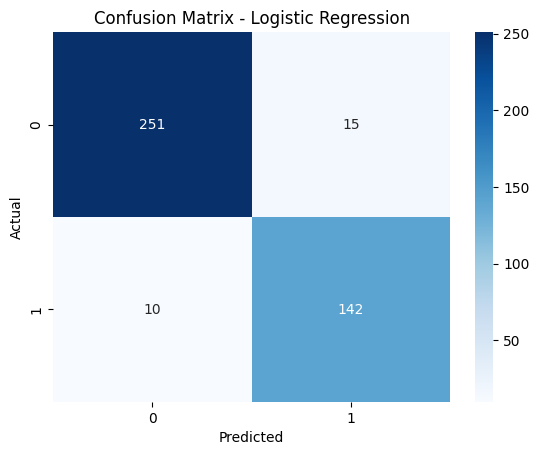

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_test = log_reg.predict(X_test)

# Metriche
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Metriche
report = classification_report(y_test, y_pred_test, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})


# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Decision Tree Classifier


Un Decision Tree Classifier (Classificatore ad Albero Decisionale) è un algoritmo di machine learning utilizzato per la **classificazione**, sia binaria che multiclasse. Funziona suddividendo ricorsivamente lo spazio delle feature in regioni, creando una struttura ad albero dove ogni nodo interno rappresenta un test su una feature, ogni ramo rappresenta un risultato del test e ogni foglia rappresenta una classe di output.


1.  **Struttura ad Albero:** Un albero decisionale è composto da:
    *   **Nodo Radice:** Il nodo iniziale dell'albero.
    *   **Nodi Interni:** Nodi che rappresentano test su una feature.
    *   **Rami:** Connessioni tra i nodi che rappresentano i risultati dei test.
    *   **Nodi Foglia:** Nodi terminali che rappresentano le classi di output.

2.  **Suddivisione Ricorsiva:** L'algoritmo costruisce l'albero suddividendo ricorsivamente i dati in base ai valori delle feature. Ad ogni nodo interno, viene selezionata la feature e il valore di soglia che meglio separano le classi.

3.  **Criterio di Suddivisione:** La scelta della feature e del valore di soglia per la suddivisione viene fatta in base a un criterio di impurità, come l'entropia o l'indice di Gini. L'obiettivo è ridurre l'impurità dei nodi figli rispetto al nodo padre.

4.  **Previsione:** Per fare una previsione, un'osservazione viene fatta passare attraverso l'albero, seguendo i rami in base ai risultati dei test sulle feature, fino a raggiungere un nodo foglia che rappresenta la classe di output.

5.  **Addestramento del Modello:** L'addestramento del modello consiste nel costruire l'albero decisionale a partire dai dati di training, scegliendo le feature e i valori di soglia che minimizzano l'impurità dei nodi.

Decision Tree Accuracy: 0.7655502392344498
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       266
           1       0.64      0.80      0.71       152

    accuracy                           0.77       418
   macro avg       0.75      0.77      0.76       418
weighted avg       0.78      0.77      0.77       418



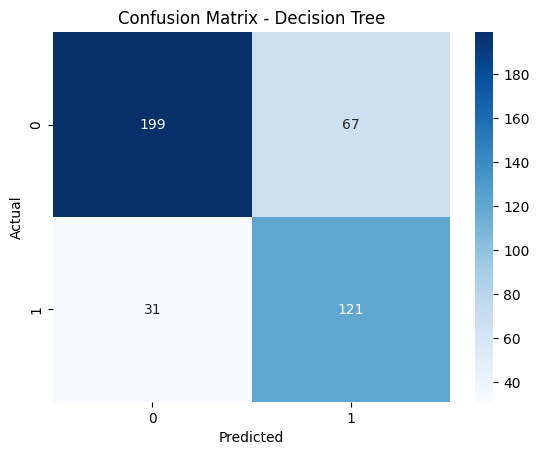

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Metriche
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Metriche
report = classification_report(y_test, y_pred_tree, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})

# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Random Forest Classifier

Un Random Forest Classifier (Classificatore a Foresta Casuale) è un algoritmo di machine learning di tipo ensemble, utilizzato per la **classificazione**. Si basa sulla combinazione di più alberi decisionali, addestrati su sottoinsiemi casuali dei dati e delle feature, per ottenere una previsione più robusta e accurata.

#### Come Funziona?

1.  **Creazione di Alberi Decisionali:** L'algoritmo crea un numero specificato di alberi decisionali. Ogni albero viene addestrato su un sottoinsieme casuale dei dati di training (bagging) e su un sottoinsieme casuale delle feature.

2.  **Bagging (Bootstrap Aggregating):** Il bagging consiste nel creare più set di training campionando casualmente i dati originali con reinserimento. Questo significa che alcuni campioni possono essere inclusi più volte in un set di training, mentre altri possono essere esclusi.

3.  **Random Subspace:** Per ogni albero, viene selezionato un sottoinsieme casuale delle feature. Questo introduce ulteriore diversità tra gli alberi.

4.  **Previsione:** Per fare una previsione, ogni albero decisionale nella foresta produce una previsione. La previsione finale della foresta è ottenuta tramite una votazione (per la classificazione) o una media (per la regressione) delle previsioni dei singoli alberi.

5.  **Addestramento del Modello:** L'addestramento del modello consiste nel costruire la foresta di alberi decisionali a partire dai dati di training, utilizzando il bagging e il random subspace.

Random Forest Accuracy: 0.8110047846889952
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.75      0.74       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418



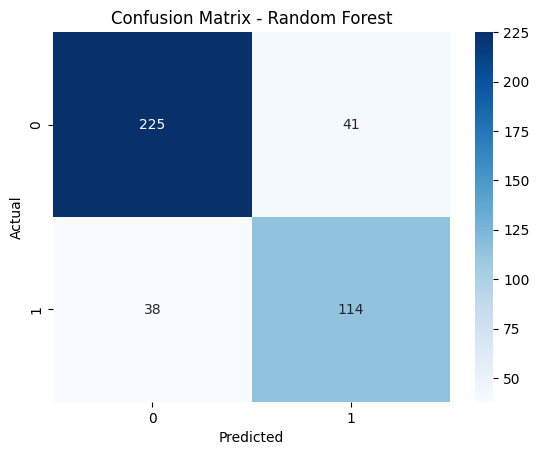

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Metriche
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Metriche
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})


# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Gradient Boosting Classifier


Un Gradient Boosting Classifier è un algoritmo di machine learning di tipo ensemble, utilizzato per la **classificazione**. Si basa sulla combinazione di più modelli deboli (solitamente alberi decisionali), addestrati in modo sequenziale, dove ogni modello successivo cerca di correggere gli errori del modello precedente.


1.  **Addestramento Sequenziale:** L'algoritmo addestra i modelli in modo sequenziale, dove ogni modello successivo cerca di correggere gli errori del modello precedente.

2.  **Modelli Deboli:** I modelli utilizzati sono solitamente alberi decisionali di profondità limitata (weak learners).

3.  **Funzione di Perdita:** L'algoritmo utilizza una funzione di perdita per misurare gli errori del modello. L'obiettivo è minimizzare questa funzione di perdita.

4.  **Gradient Descent:** L'algoritmo utilizza il gradient descent per trovare la direzione in cui minimizzare la funzione di perdita.

5.  **Aggiornamento dei Pesi:** Ogni modello successivo viene addestrato sui residui (errori) del modello precedente, dando più peso alle osservazioni che sono state classificate in modo errato.

6.  **Previsione:** Per fare una previsione, le previsioni di tutti i modelli vengono combinate per ottenere la previsione finale.

7.  **Addestramento del Modello:** L'addestramento del modello consiste nel costruire la sequenza di modelli deboli a partire dai dati di training, utilizzando il gradient descent e l'aggiornamento dei pesi.


Gradient Boosting Accuracy: 0.8803827751196173
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       266
           1       0.85      0.82      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



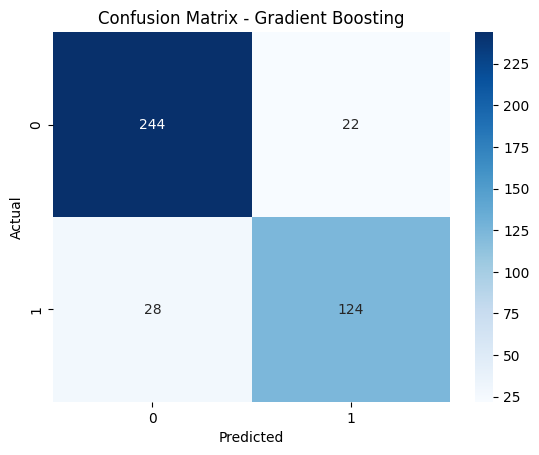

In [45]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Metriche
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Metriche
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})

# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Support Vector Machine (SVM) Classifier


Un Support Vector Machine (SVM) Classifier è un algoritmo di machine learning utilizzato per la **classificazione**, sia binaria che multiclasse. L'obiettivo principale di un SVM è trovare un iperpiano ottimale che separi le diverse classi nel modo più efficace possibile.

#### Come Funziona?

1.  **Iperpiano di Separazione:** L'algoritmo cerca di trovare un iperpiano (una linea in 2D, un piano in 3D, ecc.) che separi le diverse classi nel modo più efficace possibile.

2.  **Margine:** L'algoritmo cerca di massimizzare il margine, ovvero la distanza tra l'iperpiano e i punti più vicini di ogni classe (i support vectors).

3.  **Kernel Trick:** L'algoritmo può utilizzare il kernel trick per mappare i dati in uno spazio di feature di dimensione superiore, dove è più facile trovare un iperpiano di separazione. I kernel più comuni sono:
    *   **Lineare:** Utilizzato quando i dati sono linearmente separabili.
    *   **Polinomiale:** Utilizzato per dati non linearmente separabili.
    *   **RBF (Radial Basis Function):** Utilizzato per dati non linearmente separabili.

4.  **Support Vectors:** I support vectors sono i punti più vicini all'iperpiano e sono cruciali per la definizione dell'iperpiano stesso.

5.  **Addestramento del Modello:** L'addestramento del modello consiste nel trovare l'iperpiano ottimale che massimizza il margine e separa le classi nel modo più efficace possibile.


SVM Accuracy: 0.6555023923444976
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76       266
           1       0.55      0.28      0.37       152

    accuracy                           0.66       418
   macro avg       0.62      0.57      0.57       418
weighted avg       0.63      0.66      0.62       418



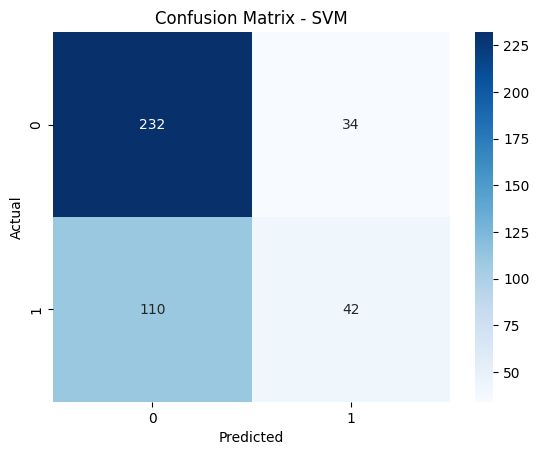

In [46]:
# Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Metriche
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Metriche
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Salva i risultati
results.append({
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})

# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### K-Nearest Neighbors (KNN) Classifier

Un K-Nearest Neighbors (KNN) Classifier è un algoritmo di machine learning utilizzato per la **classificazione** e la **regressione**. È un algoritmo di tipo "lazy learning" o "instance-based learning", il che significa che non apprende esplicitamente un modello dai dati di training, ma memorizza i dati di training e li utilizza per fare previsioni.

#### Come Funziona?

1.  **Memorizzazione dei Dati:** L'algoritmo memorizza tutti i dati di training.

2.  **Calcolo della Distanza:** Per fare una previsione su un nuovo punto dati, l'algoritmo calcola la distanza tra il nuovo punto dati e tutti i punti dati nel training set.

3.  **Selezione dei K Vicini:** L'algoritmo seleziona i K punti dati più vicini al nuovo punto dati.

4.  **Classificazione:** Per la classificazione, la classe del nuovo punto dati viene determinata dalla classe più frequente tra i K vicini.

5.  **Addestramento del Modello:** L'addestramento del modello consiste semplicemente nel memorizzare i dati di training.


KNN Accuracy: 0.6507177033492823
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       266
           1       0.52      0.55      0.53       152

    accuracy                           0.65       418
   macro avg       0.63      0.63      0.63       418
weighted avg       0.65      0.65      0.65       418



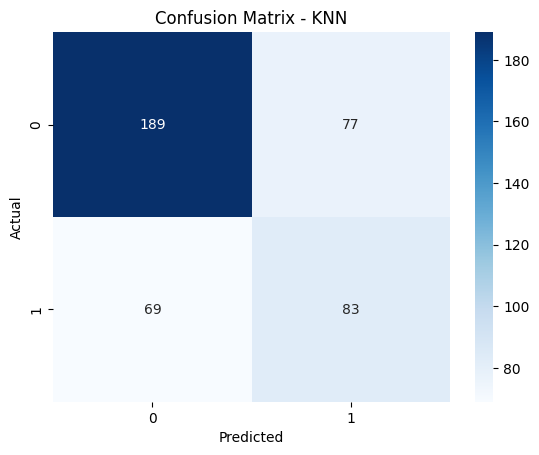

In [50]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Metriche
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Metriche
report = classification_report(y_test, y_pred_knn, output_dict=True)

# Salva i risultati
results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})

# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Gaussian Naive Bayes Classifier


Un Gaussian Naive Bayes Classifier è un algoritmo di machine learning utilizzato per la **classificazione**. È un algoritmo probabilistico basato sul teorema di Bayes, che assume l'indipendenza delle feature (da cui il termine "naive").

#### Come Funziona?

1.  **Teorema di Bayes:** L'algoritmo si basa sul teorema di Bayes, che calcola la probabilità di un'ipotesi (classe) dato un insieme di evidenze (feature).

    ```
    P(classe | feature) = [P(feature | classe) * P(classe)] / P(feature)
    ```

2.  **Assunzione di Indipendenza:** L'algoritmo assume che le feature siano indipendenti tra loro, dato la classe. Questa è un'assunzione "naive" che semplifica i calcoli.

3.  **Distribuzione Gaussiana:** L'algoritmo assume che le feature seguano una distribuzione gaussiana (normale) per ogni classe.

4.  **Calcolo delle Probabilità:** L'algoritmo calcola le probabilità a priori delle classi e le probabilità condizionate delle feature dato ogni classe.

5.  **Classificazione:** Per fare una previsione, l'algoritmo calcola la probabilità di ogni classe dato le feature e seleziona la classe con la probabilità più alta.

6.  **Addestramento del Modello:** L'addestramento del modello consiste nel calcolare le probabilità a priori delle classi e i parametri delle distribuzioni gaussiane per ogni feature e classe.


Naive Bayes Accuracy: 0.8971291866028708
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       266
           1       0.80      0.95      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.89       418
weighted avg       0.91      0.90      0.90       418



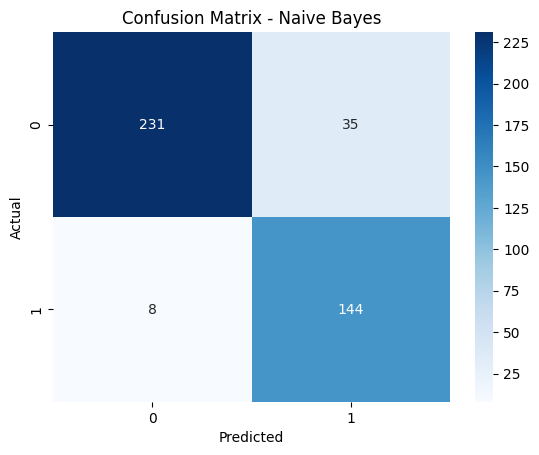

In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Metriche
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Metriche
report = classification_report(y_test, y_pred_nb, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})


# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Multi-layer Perceptron (MLP) Classifier (Neural Network)

Un Multi-layer Perceptron (MLP) Classifier è un tipo di rete neurale artificiale utilizzata per la **classificazione**. È una rete feedforward composta da più strati di neuroni (o nodi), dove ogni neurone applica una funzione di attivazione all'output di una combinazione lineare dei suoi input.

#### Come Funziona?

1.  **Struttura della Rete:** La rete è composta da:
    *   **Strato di Input:** Riceve le feature dei dati.
    *   **Strati Nascosti:** Eseguono trasformazioni non lineari dei dati.
    *   **Strato di Output:** Produce le previsioni (classi).

2.  **Neuroni:** Ogni neurone calcola una combinazione lineare dei suoi input, a cui applica una funzione di attivazione non lineare (es. sigmoide, ReLU, tanh).

3.  **Funzione di Attivazione:** La funzione di attivazione introduce non linearità nella rete, permettendo di apprendere relazioni complesse tra i dati.

4.  **Propagazione in Avanti (Forward Propagation):** I dati vengono propagati attraverso la rete, strato per strato, fino a raggiungere lo strato di output.

5.  **Funzione di Perdita:** La funzione di perdita misura l'errore tra le previsioni della rete e le etichette reali.

6.  **Retropropagazione (Backpropagation):** L'errore viene propagato all'indietro attraverso la rete per calcolare i gradienti dei pesi.

7.  **Ottimizzazione dei Pesi:** I pesi della rete vengono aggiornati utilizzando un algoritmo di ottimizzazione (es. discesa del gradiente) per minimizzare la funzione di perdita.

8.  **Addestramento del Modello:** L'addestramento del modello consiste nell'iterare i passaggi di propagazione in avanti, calcolo della perdita, retropropagazione e ottimizzazione dei pesi fino a quando la rete non converge.


Neural Network Accuracy: 0.9354066985645934
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.91      0.91      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



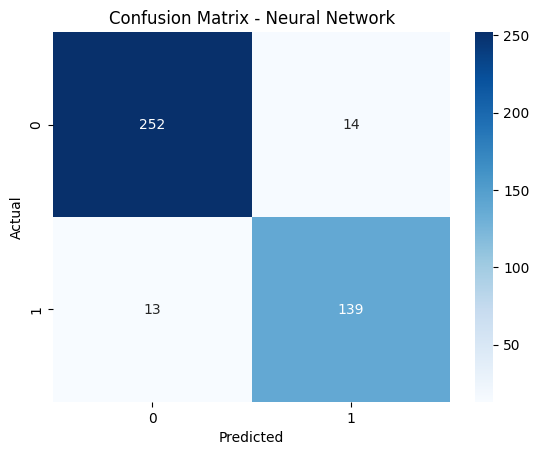

In [49]:
# Neural Network
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

# Metriche
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Metriche
report = classification_report(y_test, y_pred_mlp, output_dict=True)

# Salva i risultati
results.append({
    "Model": "Neural Network",
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": report['weighted avg']['precision'],
    "Recall": report['weighted avg']['recall'],
    "F1-Score": report['weighted avg']['f1-score']
})

# Matrice di Confusione
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
